**Here we are using the Fashion MNIST dataset for the purpose of Image Classification**

We will use Fully Connected Neural Network to annalyze the data and predict the Classes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
import keras

In [ ]:
train_data = pd.read_csv('/content/fashion-mnist_train.csv')
test_data = pd.read_csv('/content/fashion-mnist_test.csv')

In [ ]:
train_data.shape

(60000, 785)

In [ ]:
test_data.shape

(10000, 785)

In [ ]:
train_data.sample(3)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
8561,2,0,0,0,0,0,0,0,0,0,...,176,140,30,79,120,0,0,0,0,0
28935,4,0,0,0,0,0,0,0,0,0,...,3,2,0,82,174,149,0,0,0,0
28587,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize the distribution of different fashion items in the dataset to understand the data better

In [ ]:
train_data['label'].value_counts(normalize=True)

,proportion
label,
2,0.1
9,0.1
6,0.1
0,0.1
3,0.1
4,0.1
5,0.1
8,0.1
7,0.1


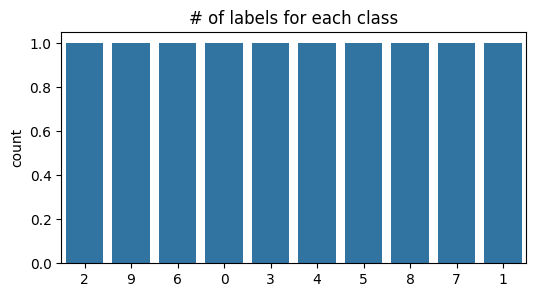

In [ ]:
plt.figure(figsize = (6, 3))
g = sns.countplot(train_data.label, order = train_data["label"].value_counts().index)
g.set_title("# of labels for each class")
plt.show()

Normalize the image pixel values for effective model training.

In [ ]:
x_train = train_data.iloc[:, 1:] / 255
y_train = train_data.iloc[:, 0]

x_test = test_data.iloc[:, 1:] / 255
y_test = test_data.iloc[:,0]

Convert the categorical labels into a one-hot encoded format to suit the
neural network’s output layer

In [ ]:
from keras.utils import to_categorical

In [ ]:
# one hot encode target values
y_train_coded = to_categorical(y_train)
y_test_coded = to_categorical(y_test)

Checking the individual images

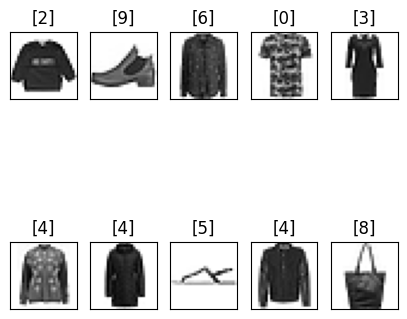

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train.iloc[i].values.reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title([label_index])
plt.show()
plt.tight_layout()

In [ ]:
#  Reshaping the data to be provided as input
x_train = x_train.values.reshape(x_train.shape[0], * (28, 28, 1))
x_test = x_test.values.reshape(x_test.shape[0], * (28, 28, 1))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

Assess the model’s performance using both training and validation
datasets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train_coded, y_validate = train_test_split(x_train, y_train_coded, test_size=0.2, random_state=29)

In [ ]:
x_validate.shape

(9600, 28, 28, 1)

Design a fully connected neural network with appropriate input, hidden,
and output layers.

In [ ]:
cnn_fashion = Sequential()
cnn_fashion.add(Dense(32, input_shape=(28,28,1), activation='relu'))
cnn_fashion.add(Dense(32, activation='relu'))

cnn_fashion.add(Flatten())
cnn_fashion.add(Dense(units=128, activation='relu'))
cnn_fashion.add(Dense(units=10, activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the model on the preprocessed training data, using categorical
cross-entropy as the loss function, stochastic gradient descent as the
optimizer, and accuracy as the

In [ ]:
cnn_fashion.compile(loss ='categorical_crossentropy', optimizer='sgd' ,metrics=['accuracy'])

Utilize a validation split to monitor the model’s performance on unseen
data during training

In [ ]:
epochs = 50
batch_size = 400

history = cnn_fashion.fit(
    x_train, y_train_coded,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_validate, y_validate)
)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4574 - loss: 1.9249 - val_accuracy: 0.7200 - val_loss: 0.9396
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7498 - loss: 0.8249 - val_accuracy: 0.7837 - val_loss: 0.6622
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7862 - loss: 0.6347 - val_accuracy: 0.7953 - val_loss: 0.5933
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7986 - loss: 0.5789 - val_accuracy: 0.7999 - val_loss: 0.5588
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8093 - loss: 0.5426 - val_accuracy: 0.8095 - val_loss: 0.5361
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8147 - loss: 0.5329 - val_accuracy: 0.8119 - val_loss: 0.5334
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8192 - loss: 0.5065 - val_accuracy: 0.8175 - val_loss: 0.5106
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8237 - loss: 0.5013 - val_accuracy: 0.8295 - val_lo

Visualize the training and validation loss and accuracy to identify any signs
of overfitting or underfitting

Text(0.5, 1.0, 'Accuracy')

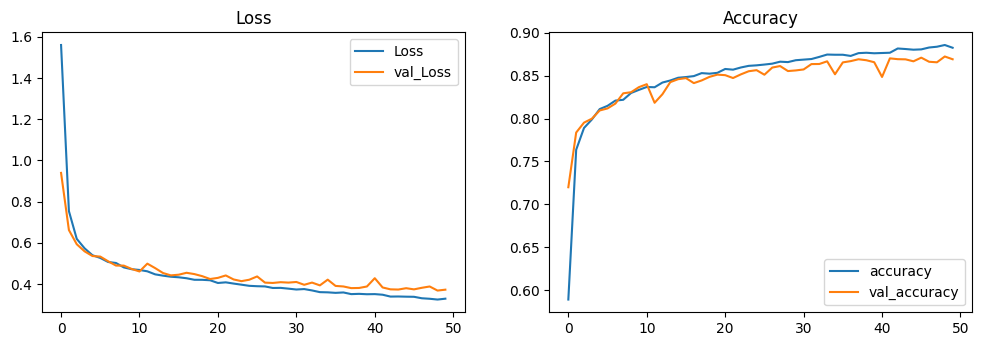

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

In [ ]:
predictions = cnn_fashion.evaluate(x_test, y_test_coded)
print(f'Test Accuracy : {predictions[1]:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8680 - loss: 0.3680
Test Accuracy : 0.87


In [ ]:
predicted_classes = cnn_fashion.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
predicted_classes

array([[9.2851496e-01, 1.2211873e-06, 1.1548568e-04, ..., 1.5145599e-12,
        2.7334914e-05, 1.0040536e-12],
       [1.4740016e-05, 9.9996388e-01, 1.6070810e-06, ..., 8.5613037e-09,
        2.6734918e-07, 1.1271729e-08],
       [1.6830033e-02, 6.1108014e-03, 6.1886913e-01, ..., 2.4677495e-06,
        4.8354799e-03, 2.3411079e-05],
       ...,
       [3.0256430e-08, 4.0256495e-08, 6.3386678e-06, ..., 3.9661314e-09,
        9.9997103e-01, 2.4852009e-09],
       [2.8785873e-02, 5.1006268e-06, 2.7971810e-03, ..., 2.8950996e-11,
        7.0521933e-01, 1.1442973e-08],
       [4.1184820e-02, 3.4268847e-01, 4.5868352e-01, ..., 6.4564330e-12,
        5.4261327e-04, 5.0875301e-11]], dtype=float32)

In [ ]:
np.argmax(predicted_classes, axis=1)

array([0, 1, 2, ..., 8, 8, 2])

From the Accuracy graph we can say that the model accuracy is little less for validation set than the training set. Therefore the model is little overfit. At this point we can try with different options to reduce the overfitting.